# Páginas para programar python

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

# Tipos de regresion

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/reg_data.csv')
df.head()

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# Desripcion de base de datos
## Mis variables de interes
`Gender`: Variable cvategorica, explica los generos de los trabajadores

`Salary`: etc

## Pregunta de investigacion 1 
### Cual seria impacto de Age Salary

Esta pregunta se puede contestar con un modelo de regresion:

    `Salary = b0 + b1*Age`   
    
* b1 es el impacto de Age en Salary
* b0 es el Salary cuando Age no tiene impacto en Salary

Variable dependiente : `Salary`

Variable independiente : `Age`

In [5]:
df.corr() # Valor correlacion

,Salary,Age,Weight
Salary,1.000000,0.616834,-0.080883
Age,0.616834,1.000000,-0.212340
Weight,-0.080883,-0.212340,1.000000


### Observacion:
Al observar esta tabla de correlacion, podemes ver:

    1. `Salary` y `Age` tien una correlacion positiva (0.616834)
    2. ...

In [6]:
# y = b0 + b1*x1 + b2*x2 + ...

#y = df['Salary']
#x = df['Age']

modelA = sm.OLS.from_formula('Salary~Age', data = df)
resultA = modelA.fit()
resultA.summary()


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Mon, 29 Nov 2021   Prob (F-statistic):             0.0326
Time:                        13:50:51   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OBSERVACIONES
* R-cuadrado : 0.380; por lo tanto 38% de Salary explicando por el modelo Salary = b0 + b1*Age
* Df Model : 1
                Salary = b0 + b1*Age

* b0 = 349.4458
* b1 = 48.0932

### Modelo final seria:

Salary349.4458 + 48.0932*Age

In [8]:
print('Salary of a person with Age 33 es: \t', 349.4458 + 48.0932*33)
print('Su residual seria :\t', 1500 - 1936.5214)
df.iloc[:2, :]

Salary of a person with Age 33 es: 	 1936.5214
Su residual seria :	 -436.5214000000001


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


## Valores Ajustado:

In [ ]:
va = 

In [30]:
resultA.resid
print.resi
RESI.describe()

AttributeError: 'builtin_function_or_method' object has no attribute 'resi'

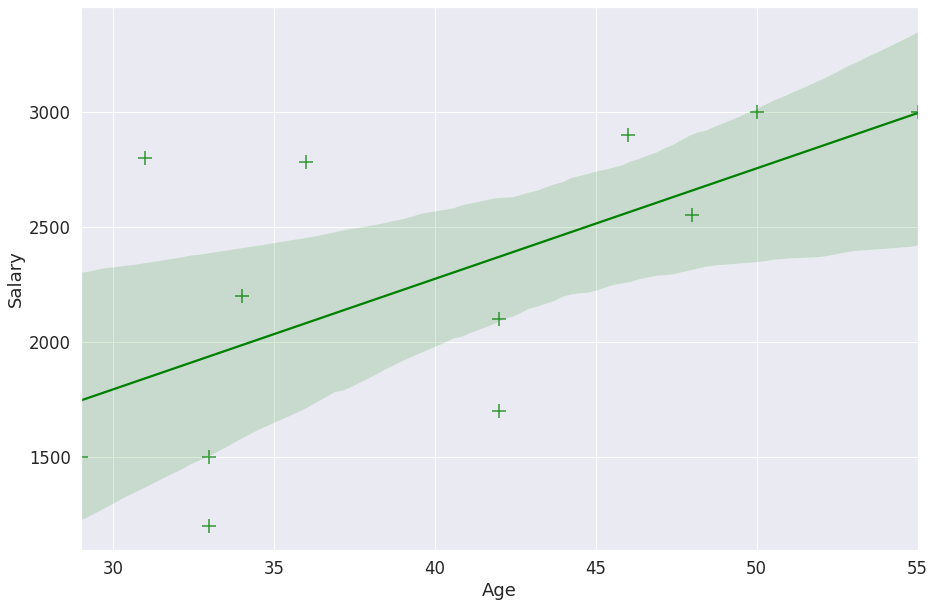

In [26]:
plt.figure(figsize = (15, 10))
sns.set(font_scale=1.5)
#ax = 
sns.regplot(x='Age',
            y= 'Salary',
            data = df,
            color = 'green',
            marker = '+',
            scatter_kws = {'s':200}
           )
#ax.text(45, 1500,
      # 'Salary = 349.4458 + 48.0932*Age',
      # horizontalalignment = 'left',
      # size = 'medium',
      # color = 'black',
      # weight = 'semiblond')


In [ ]:
res =sns.scatterplot(x = va,
                     y = RESI,
                    )


## Conclusiones:
1. Por lo tanto R cuadrado es 0.380, nuestro modelo Salary= b0 + b1*Age no es eficiente
2. los RESI tiene un patron , por lo tanto, no son independientes

## Pregunta de investigacion 2
### Cual seria impacto de Age y Gender en Salary

Esta pregunta se puede contestar con un modelo de regresion:

    `Salary = b0 + b1*Age + b2*Gender`   
    
* b1 es el impacto de Age en Salary
* b0 es el Salary cuando Age no tiene impacto en Salary

Variable dependiente : `Salary`

Variable independiente : `Age`, `Gender`

In [31]:
modelB = sm.OLS.from_formula('Salary~Age+Gender', data = df)
resultB = modelB.fit()
resultB.summary()

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Mon, 29 Nov 2021   Prob (F-statistic):             0.0945
Time:                        14:21:25   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""